In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load the dataset
data = pd.read_csv(r'D:\mini project\AI project\chatbot\data\data.csv')

# Check for missing values
print("\nMissing values in Labels Data:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()


Missing values in Labels Data:
Body Size               0
Body Weight             0
Height                  0
Bone Structure          0
Complexion              0
General feel of skin    0
Texture of Skin         0
Hair Color              0
Appearance of Hair      0
Shape of face           0
Eyes                    0
Eyelashes               0
Blinking of Eyes        0
Cheeks                  0
Nose                    0
Teeth and gums          0
Lips                    0
Nails                   0
Appetite                0
Liking tastes           0
Dosha                   0
dtype: int64


In [14]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, 20]   

In [15]:
# Handle categorical data in X using Label Encoding for non-numeric columns
label_encoder = LabelEncoder()

# Apply label encoding on each categorical column in X
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

In [16]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (960, 20)
Testing set size: (240, 20)


In [17]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in forest
    'max_depth': [5, 10, 15],  # Limiting depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at leaf node
    'class_weight': ['balanced', None]  # Class weight for imbalanced datasets
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 1.0


In [19]:
# Initialize the Random Forest Classifier with the best parameters
rf = grid_search.best_estimator_

# Train the model
model = rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [20]:
# Calculate the accuracy
accuracy = model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy: ", cv_scores.mean())

Test Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00       125
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        10

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Cross-Validation Accuracy:  1.0


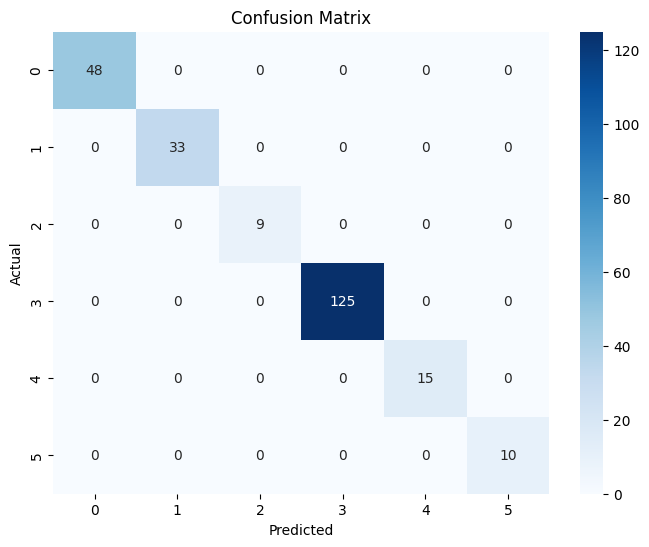

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

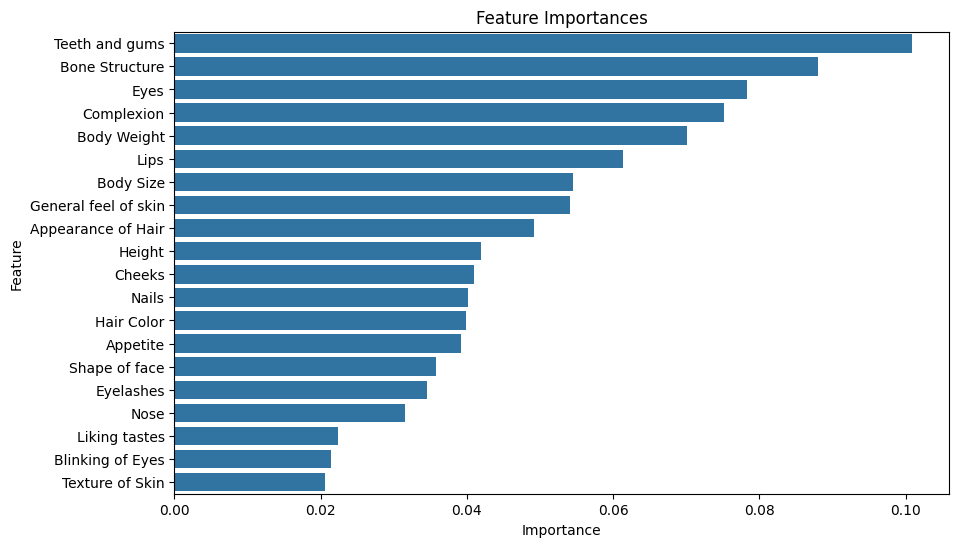

Cross-Validation Scores per fold:  [1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy:  1.0
Standard Deviation of CV Scores:  0.0


In [22]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importances")
plt.show()

print("Cross-Validation Scores per fold: ", cv_scores)
print("Average Cross-Validation Accuracy: ", cv_scores.mean())
print("Standard Deviation of CV Scores: ", cv_scores.std())